# ASEMIC WRITING

Import Axidraw, vsketch and random functions

In [62]:
from pyaxidraw import axidraw
import vsketch
from bezmerizing import Polyline
import numpy as np
from numpy.random import uniform, normal
import random

In [63]:
from scipy.stats import truncnorm
def t_normal(a, b, mu, sigma):
    tn = truncnorm((a-mu)/sigma, (b-mu)/sigma, loc=mu, scale=sigma)
    return tn.rvs(1)[0]

---

### Drawing one character

In [64]:
pline = [[10, -30], [-15, -10], [-20, 10], [-10, 30], [25, 45], [55, 0], [20, -10]]
pline2 = [[45, -25], [55, -10], [65, -25]]
pline_combo = pline + pline2

In [65]:
pts = Polyline(pline_combo).catmull_spline(-0.5).to_polyline(100)

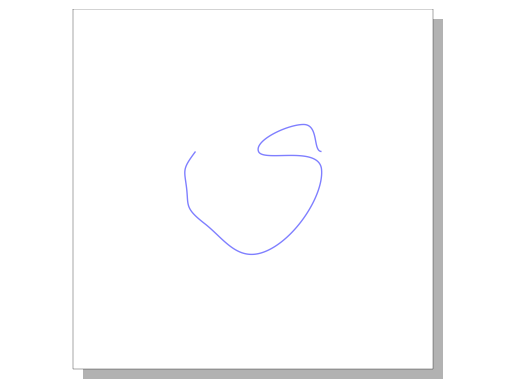

In [66]:
vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("0.5mm")
vsk.polygon(pts)
vsk.display()

Adding lines of randomized length onto each point

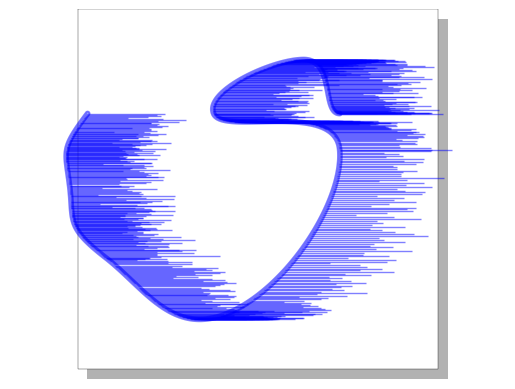

In [67]:
skip_noise_pts = []
for i, coord in enumerate(pts):
    skip_noise_pts.append([coord[0],coord[1],coord[0],coord[1]])

vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.strokeWeight(5)
vsk.polygon(pts)

smudge_length = []
vsk.stroke(1)
for i in range(len(skip_noise_pts)):
    vsk.strokeWeight(1)
    smudge_length.append(abs(normal(20, 5)))
    vsk.line(skip_noise_pts[i][0], skip_noise_pts[i][1], skip_noise_pts[i][2]+smudge_length[i], skip_noise_pts[i][3])
vsk.display()

Controling the lines so it only draws where the points are closer together which is usually where the curves on the characters are and where the ink most ink usually remains

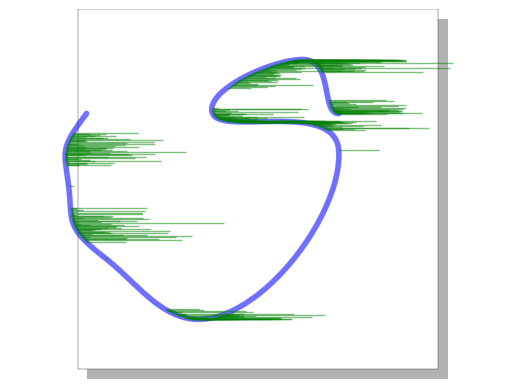

In [68]:
skip_noise_pts = []
for i, coord in enumerate(pts):
    skip_noise_pts.append([coord[0],coord[1],coord[0],coord[1]])

vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.strokeWeight(5)
vsk.polygon(pts)

smudge_length = []
vsk.stroke(2)
for i in range(len(skip_noise_pts)):
    vsk.strokeWeight(int(uniform(1,2)))
    smudge_length.append(abs(normal(10, 10)))
    if i < len(skip_noise_pts)-1:
        if abs(skip_noise_pts[i+1][1]-skip_noise_pts[i][1]) < 0.2:
            vsk.line(skip_noise_pts[i][0], skip_noise_pts[i][1], skip_noise_pts[i][2]+smudge_length[i], skip_noise_pts[i][3])
vsk.display()

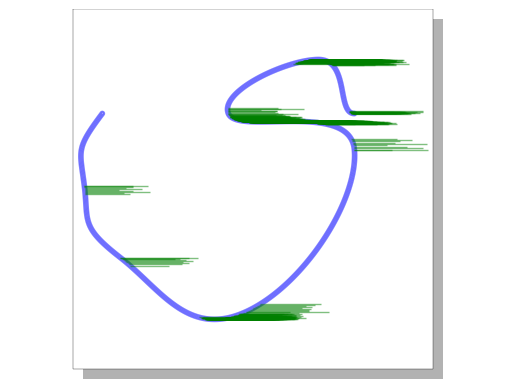

In [69]:
skip_noise_pts = []
for i, coord in enumerate(pts):
    skip_noise_pts.append([coord[0],coord[1],coord[0],coord[1]])

vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.strokeWeight(5)
vsk.polygon(pts)

smudge_length = []
vsk.stroke(2)
for i in range(len(skip_noise_pts)):
    vsk.strokeWeight(1)
    if i < len(skip_noise_pts)-10:
        if abs(skip_noise_pts[i+1][1]-skip_noise_pts[i][1]) < 0.1:
            for j in range(10):
                vsk.line(skip_noise_pts[i+j][0], skip_noise_pts[i+j][1], skip_noise_pts[i+j][2]+abs(normal(15, 3)), skip_noise_pts[i+j][3])
vsk.display()

Adding another layer with shorter lenght to create gradation

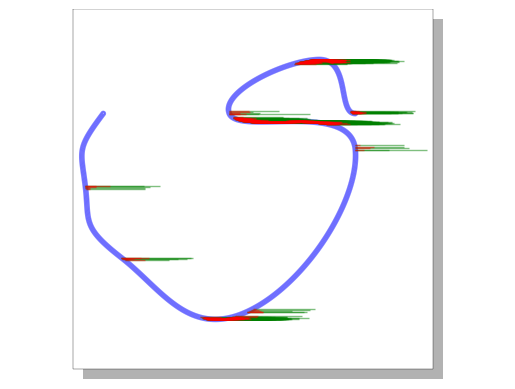

In [70]:
skip_noise_pts = []
for i, coord in enumerate(pts):
    skip_noise_pts.append([coord[0],coord[1],coord[0],coord[1]])

vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.strokeWeight(5)
vsk.polygon(pts)

smudge_length = []

for i in range(len(skip_noise_pts)):
    vsk.strokeWeight(1)
    if i < len(skip_noise_pts)-10:
        if abs(skip_noise_pts[i+1][1]-skip_noise_pts[i][1]) < 0.1:
            for j in range(5):
                vsk.stroke(2)
                vsk.line(skip_noise_pts[i+j][0], skip_noise_pts[i+j][1], skip_noise_pts[i+j][2]+abs(normal(15, 3)), skip_noise_pts[i+j][3])
                vsk.stroke(3)
                vsk.line(skip_noise_pts[i+j][0], skip_noise_pts[i+j][1], skip_noise_pts[i+j][2]+abs(normal(3, 2)), skip_noise_pts[i+j][3])
vsk.display()

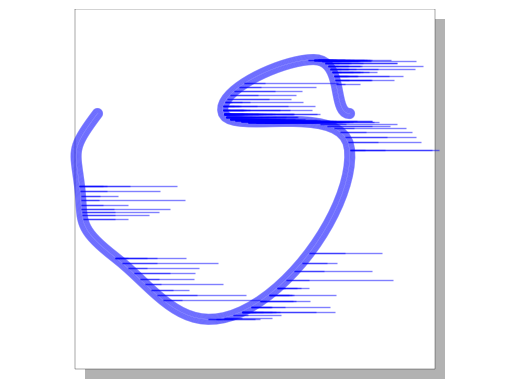

In [71]:
pts = Polyline(pline_combo).catmull_spline(-0.5).to_polyline(20)
skip_noise_pts = []
for i, coord in enumerate(pts):
    skip_noise_pts.append([coord[0],coord[1],coord[0],coord[1]])

vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm")
vsk.scale("1mm")
vsk.strokeWeight(10)
vsk.polygon(pts)

smudge_length = []
for i in range(len(skip_noise_pts)):
    vsk.strokeWeight(1)
    if i < len(skip_noise_pts)-10:
        smudge_density = abs(skip_noise_pts[i+1][1]-skip_noise_pts[i][1])
        if smudge_density < 0.15:
            for j in range(10):
                vsk.line(skip_noise_pts[i+j][0], skip_noise_pts[i+j][1], skip_noise_pts[i+j][0]+(0.2-smudge_density)*10*abs(normal(10, 3)), skip_noise_pts[i+j][3])
                vsk.line(skip_noise_pts[i+j][0], skip_noise_pts[i+j][1], skip_noise_pts[i+j][0]+(0.2-smudge_density)*10*abs(normal(4, 1)), skip_noise_pts[i+j][3])
vsk.display()

---

## Drawing lines

In [72]:
def glyph():
    xgrid = [0, 0.5, 1, 1.5, 2]
    ygrid = [0, 0.333, 1, 1.333, 2]
    pts = []
    for i in range(6):
        pts.append([random.choice(xgrid), random.choice(ygrid)])
    return pts

In [73]:
cursive_line = []
for i in range(10):
    this_glyph = glyph()
    translated = [[x + i * 2.5, y] for x, y in this_glyph]
    cursive_line += translated

In [74]:
cursive_curve = Polyline(cursive_line).catmull_spline(-0.75).to_polyline(50)

In [75]:
shear_cursive = []
angle_x = np.pi * -0.25
angle_y = 0
for coord in cursive_curve:
    shear_cursive.append([coord[0]+angle_x*coord[1],
                      coord[1]+angle_y*coord[0]])

In [76]:
cutoff_cursive = []
for coord in shear_cursive:
    if coord[1] > 0.25 and coord[1] < 1.75:
        cutoff_cursive.append(coord)

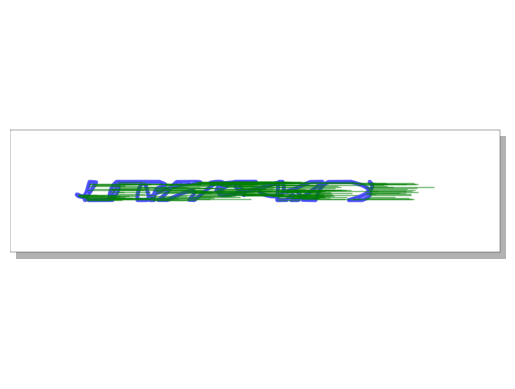

In [81]:
smudge_pts = []
for i, coord in enumerate(cutoff_cursive):
    if i % int(uniform(5,10)) == 0:
        smudge_pts.append([coord[0],coord[1],coord[0],coord[1]])

smudge_length = []
vsk = vsketch.Vsketch()
vsk.size("200mm", "50mm")
vsk.scale("1mm")
with vsk.pushMatrix():
    vsk.scale(5)
    vsk.stroke(1)
    vsk.strokeWeight(5)
    vsk.polygon(cutoff_cursive)
    vsk.stroke(2)
    for i in range(len(smudge_pts)):
        vsk.strokeWeight(1)
        smudge_length.append(abs(normal(3, 1)))
        vsk.line(smudge_pts[i][0], smudge_pts[i][1], smudge_pts[i][2]+smudge_length[i], smudge_pts[i][3])
vsk.display()

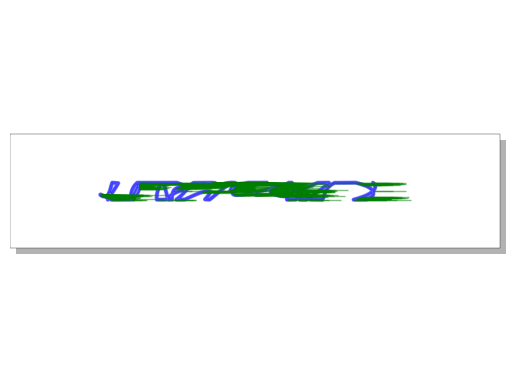

In [82]:
smudge_pts = []
for i, coord in enumerate(cutoff_cursive):
    smudge_pts.append([coord[0],coord[1],coord[0],coord[1]])

smudge_length = []
vsk = vsketch.Vsketch()
vsk.size("215mm", "50mm")
vsk.scale("1mm")
with vsk.pushMatrix():
    vsk.scale(5)
    vsk.stroke(1)
    vsk.strokeWeight(5)
    vsk.polygon(cutoff_cursive)
    vsk.stroke(2)
    for i in range(len(smudge_pts)):
        vsk.strokeWeight(1)
        smudge_length.append(abs(normal(2, 1)))
        if i < len(smudge_pts)-1:
            if abs(smudge_pts[i+1][1]-smudge_pts[i][1]) < 0.02:
                vsk.line(smudge_pts[i][0], smudge_pts[i][1], smudge_pts[i][2]+smudge_length[i], smudge_pts[i][3])
vsk.display()

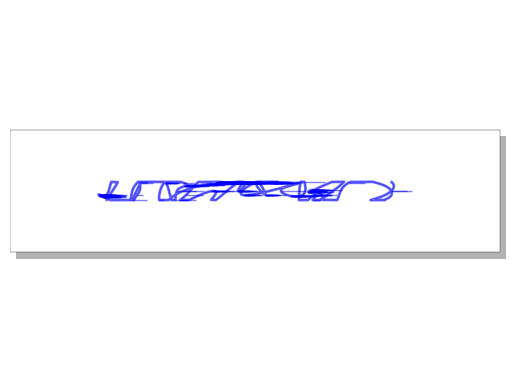

In [83]:
smudge_pts = []
for i, coord in enumerate(cutoff_cursive):
    smudge_pts.append([coord[0],coord[1],coord[0],coord[1]])

smudge_length = []
vsk = vsketch.Vsketch()
vsk.size("200mm", "50mm")
vsk.scale("1mm")
with vsk.pushMatrix():
    vsk.scale(5)
    vsk.stroke(1)
    vsk.strokeWeight(3)
    vsk.polygon(cutoff_cursive)
    vsk.stroke(1)
    for i in range(len(smudge_pts)):
        vsk.strokeWeight(1)
        smudge_length.append(abs(normal(2, 1)))
        if i < len(smudge_pts)-1:
            if abs(smudge_pts[i+1][1]-smudge_pts[i][1]) < 0.01:
                for j in range(1):
                    vsk.line(smudge_pts[i+j][0], smudge_pts[i+j][1], smudge_pts[i+j][2]+abs(normal(1, 0.5)), smudge_pts[i+j][3])
vsk.display()

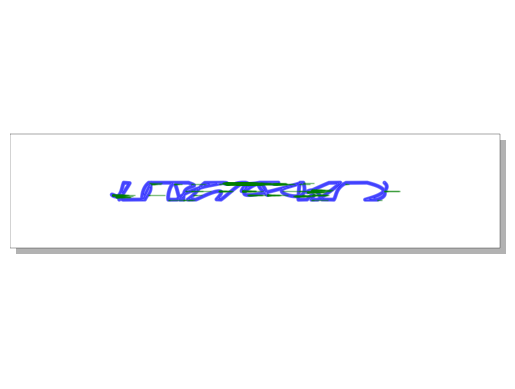

In [84]:
smudge_pts = []
for i, coord in enumerate(cutoff_cursive):
    smudge_pts.append([coord[0],coord[1],coord[0],coord[1]])

smudge_length = []
vsk = vsketch.Vsketch()
vsk.size("215mm", "50mm")
vsk.scale("1mm")
with vsk.pushMatrix():
    vsk.scale(5)
    vsk.stroke(1)
    vsk.strokeWeight(5)
    vsk.polygon(cutoff_cursive)
    vsk.stroke(2)
    for i in range(len(smudge_pts)):
        vsk.strokeWeight(1)
        smudge_length.append(abs(normal(2, 1)))
        if i < len(smudge_pts)-10:
            smudge_density = abs(smudge_pts[i+1][1]-smudge_pts[i][1])
            if smudge_density < 0.005:
                for j in range(1):
                    vsk.line(smudge_pts[i+j][0], smudge_pts[i+j][1], smudge_pts[i+j][0]+(0.02-smudge_density)*10*abs(normal(6, 2)), smudge_pts[i+j][3])
                    vsk.line(smudge_pts[i+j][0], smudge_pts[i+j][1], smudge_pts[i+j][0]+(0.02-smudge_density)*10*abs(normal(1, 0.5)), smudge_pts[i+j][3])
vsk.display()

---

## Drawing multiple lines

In [219]:
def clipped_cursive_line(
                         n_glyphs=10,
                         spacing=2.5,
                         catmull=-0.5):
    xgrid = [0, 0.5, 1, 1.5, 2]
    ygrid = [0, 0.333, 1, 1.333, 2]
    cursive_line = []
    for i in range(n_glyphs):
        pts = []
        for j in range(6):
            pts.append([random.choice(xgrid), random.choice(ygrid)])
        translated = [[x + i * spacing, y] for x, y in pts]
        cursive_line += translated
    cursive_curve = Polyline(cursive_line).catmull_spline(catmull).to_polyline(100)
    shear_cursive = []
    for coord in cursive_curve:
        shear_cursive.append([coord[0], coord[1]])
    cutoff_cursive = []
    for coord in shear_cursive:
        if coord[1] > 0.25 and coord[1] < 1.75:
            cutoff_cursive.append(coord)
    return cutoff_cursive

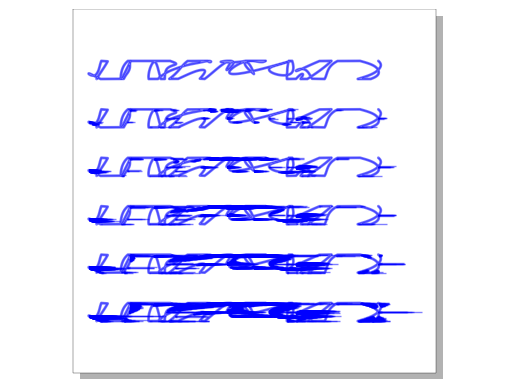

In [86]:
vsk = vsketch.Vsketch()
vsk.size("150mm", "150mm")
vsk.scale("1mm")
for i in range(6):
    with vsk.pushMatrix():
        vsk.translate(0, i * 20)
        vsk.scale(5)
        vsk.strokeWeight(3)
        vsk.polygon(cutoff_cursive)
        
        smudge_pts = []
        for k, coord in enumerate(cutoff_cursive):
            smudge_pts.append([coord[0],coord[1],coord[0],coord[1]])
        for j in range(len(smudge_pts)):
            vsk.strokeWeight(1)
            if j < len(smudge_pts)- 3:
                smudge_density = abs(smudge_pts[j][1]-smudge_pts[j+1][1])
                if smudge_density < 0.005*i:
                    for k in range(3):
                        vsk.line(smudge_pts[j+k][0], smudge_pts[j+k][1], smudge_pts[j+k][0]+(0.005*i-smudge_density)*10*abs(normal(10, 2)), smudge_pts[j+k][3])
                        vsk.line(smudge_pts[j+k][0], smudge_pts[j+k][1], smudge_pts[j+k][0]+(0.005*i-smudge_density)*10*abs(normal(1, 0.5)), smudge_pts[j+k][3])

vsk.display()

In [87]:
def clipped_cursive_line(pt_count=6,
                         n_glyphs=10,
                         spacing=2.5,
                         catmull=-0.5,
                         shear_angle=np.pi*-0.25):
    
    xgrid = [0, 0.5, 1, 1.5, 2]
    ygrid = [0, 0.333, 1, 1.333, 2]
    cursive_line = []
        
    for i in range(n_glyphs):
        pts = []
        for j in range(pt_count):
            pts.append([random.choice(xgrid), random.choice(ygrid)])
        translated = [[x + i * spacing, y] for x, y in pts]
        cursive_line += translated
            
    cursive_curve = Polyline(cursive_line).catmull_spline(catmull).to_polyline(20)
    shear_cursive = []
        
    for coord in cursive_curve:
        shear_cursive.append([coord[0]+shear_angle*coord[1], coord[1]])
    cutoff_cursive = []
        
    for coord in shear_cursive:
        if coord[1] > 0.25 and coord[1] < 1.75:
            cutoff_cursive.append(coord)
    return cutoff_cursive

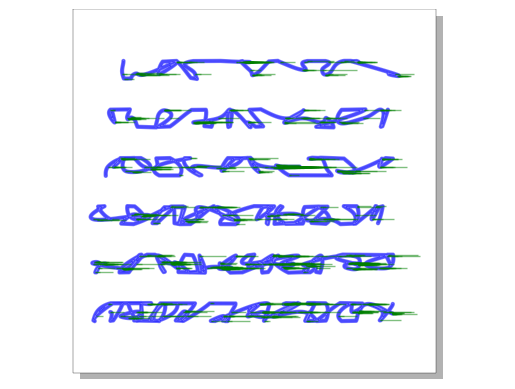

In [88]:
vsk = vsketch.Vsketch()
vsk.size("150mm", "150mm")
vsk.scale("1mm")
    
for i in range(6):
    with vsk.pushMatrix():
        vsk.translate(0,i*20)
        vsk.scale(5)
        vsk.strokeWeight(5)
        vsk.stroke(1)
        smudge_lines = []
        for coord in clipped_cursive_line(pt_count=3+i, shear_angle= i*-0.1):
            smudge_lines.append([coord[0],coord[1]])
        smudge_pts = []
        for k, coord in enumerate(smudge_lines):
            smudge_pts.append([coord[0],coord[1],coord[0],coord[1]])
        
        vsk.polygon(smudge_lines)
        
        for j in range(len(smudge_pts)):
            vsk.strokeWeight(1)
            if j < len(smudge_pts)- 1:
                smudge_density = abs(smudge_pts[j][1]-smudge_pts[j+1][1])
                if smudge_density < 0.01:
                    for k in range(1):
                        vsk.stroke(2)
                        vsk.line(smudge_pts[j+k][0], smudge_pts[j+k][1], smudge_pts[j+k][0]+(0.02-smudge_density)*10*abs(normal(8, 3)), smudge_pts[j+k][3])
                        vsk.stroke(2)
                        vsk.line(smudge_pts[j+k][0], smudge_pts[j+k][1], smudge_pts[j+k][0]+(0.02-smudge_density)*10*abs(normal(2, 0.5)), smudge_pts[j+k][3])

vsk.display()

---

# AXIDRAW

In [92]:
import sys
!{sys.executable} -m pip install https://cdn.evilmadscientist.com/dl/ad/public/AxiDraw_API.zip

  Using cached https://cdn.evilmadscientist.com/dl/ad/public/AxiDraw_API.zip (363 kB)
  Preparing metadata (setup.py) ... done


In [93]:
def glyph():
    xgrid = [0, 0.5, 1, 1.5, 2]
    ygrid = [0, 0.333, 1, 1.333, 2]
    pts = []
    for i in range(6):
        pts.append([random.choice(xgrid), random.choice(ygrid)])
    return pts

    cursive_line = []
    for i in range(10):
        this_glyph = glyph()
        translated = [[x + i * 2.5, y] for x, y in this_glyph]
        cursive_line += translated
    
    shear_cursive = []
    angle_x = np.pi * -0.25
    angle_y = 0
    for coord in cursive_curve:
        shear_cursive.append([coord[0]+angle_x*coord[1],
                          coord[1]+angle_y*coord[0]])
    
    cursive_curve = Polyline(cursive_line).catmull_spline(-0.75).to_polyline(50)
    
    cutoff_cursive = []
    for coord in shear_cursive:
        if coord[1] > 0.25 and coord[1] < 1.75:
            cutoff_cursive.append(coord)

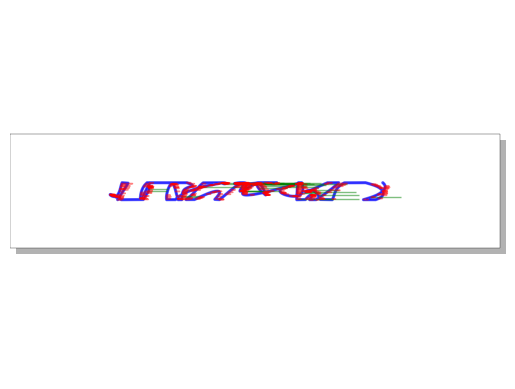

In [94]:
smudge_pts = []
smudge_pts_short = []
for i, coord in enumerate(cutoff_cursive):
    if i % int(uniform(15,20)) == 0:
        smudge_pts.append([coord[0],coord[1],coord[0],coord[1]])
    if i % int(uniform(3,8)) == 0:
        smudge_pts_short.append([coord[0],coord[1],coord[0],coord[1]])

smudge_length = []
vsk = vsketch.Vsketch()
vsk.size("215mm", "50mm")
vsk.scale("1mm")
with vsk.pushMatrix():
    vsk.scale(5)
    vsk.penWidth("0.2mm",1)
    vsk.stroke(1)
    vsk.strokeWeight(5)
    vsk.polygon(cutoff_cursive)
    vsk.penWidth("0.1mm",2)
    vsk.penWidth("0.2mm",3)
    vsk.stroke(2)
    for i in range(len(smudge_pts)):
        vsk.strokeWeight(1)
        if i < len(smudge_pts) - 1:
#             vsk.stroke(2)
            smudge_density = abs(smudge_pts[i+1][1]-smudge_pts[i][1])
#             vsk.line(smudge_pts[i+j][0], smudge_pts[i+j][1], smudge_pts[i+j][0]+(smudge_density)*abs(normal(25, 5)), smudge_pts[i+j][3])
#             vsk.stroke(1)
#             vsk.strokeWeight(2)
#             vsk.line(smudge_pts[i+j][0], smudge_pts[i+j][1], smudge_pts[i+j][0]+(smudge_density)*abs(normal(3, 1.5)), smudge_pts[i+j][3])
            
            if smudge_density < 0.1:
                for j in range(1):
                    vsk.stroke(2)
                    vsk.line(smudge_pts[i+j][0], smudge_pts[i+j][1], smudge_pts[i+j][0]+(0.15 - smudge_density)*abs(normal(30, 10)), smudge_pts[i+j][3])
            
    for i in range(len(smudge_pts_short)):
        vsk.strokeWeight(2)            
        if i < len(smudge_pts_short)-1:    
            smudge_density = abs(smudge_pts_short[i+1][1]-smudge_pts_short[i][1])
            if smudge_density < 2:
                
                for j in range(1):        
                    vsk.stroke(3)
                    vsk.line(smudge_pts_short[i+j][0], smudge_pts_short[i+j][1], smudge_pts_short[i+j][0]+(2 - smudge_density)*abs(normal(0.18, 0.02)), smudge_pts_short[i+j][3])
vsk.display()

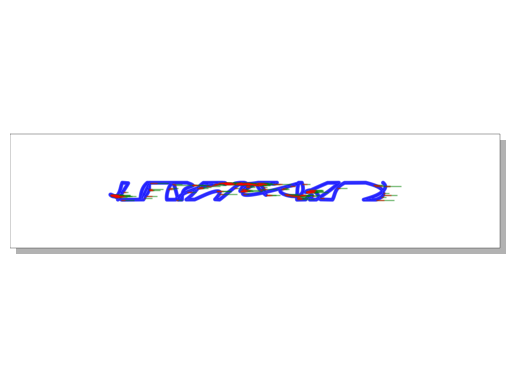

In [199]:
smudge_pts = []
smudge_pts_short = []
for i, coord in enumerate(cutoff_cursive):
    if i % int(uniform(4,8)) == 0:
        smudge_pts.append([coord[0],coord[1],coord[0],coord[1]])
    if i % int(uniform(6,8)) == 0:
        smudge_pts_short.append([coord[0],coord[1],coord[0],coord[1]])

smudge_length = []
vsk = vsketch.Vsketch()
vsk.size("215mm", "50mm")
vsk.scale("1mm")
with vsk.pushMatrix():
    vsk.scale(5)
    vsk.penWidth("0.2mm",1)
    vsk.stroke(1)
    vsk.strokeWeight(7)
    vsk.polygon(cutoff_cursive)
    vsk.penWidth("0.5mm",2)
    vsk.penWidth("0.1mm",3)
    vsk.stroke(2)
    for i in range(len(smudge_pts)):
        vsk.strokeWeight(1)
        if i < len(smudge_pts) - 1:
            smudge_density = abs(smudge_pts[i+1][1]-smudge_pts[i][1])
            if smudge_density < 0.06:
                for j in range(1):
                    vsk.stroke(2)
                    vsk.strokeWeight(1)
                    vsk.line(smudge_pts[i+j][0], smudge_pts[i+j][1], smudge_pts[i+j][0]+(0.08-smudge_density)*abs(normal(20, 5)), smudge_pts[i+j][3])
                    vsk.stroke(3)
                    vsk.strokeWeight(1)
                    vsk.line(smudge_pts[i+j][0], smudge_pts[i+j][1], smudge_pts[i+j][0]+(0.08-smudge_density)*abs(normal(8, 2)), smudge_pts[i+j][3])

            
#     for i in range(len(smudge_pts_short)):
#         vsk.strokeWeight(2)            
#         if i < len(smudge_pts_short)-1:    
#             smudge_density = abs(smudge_pts_short[i+1][1]-smudge_pts_short[i][1])
#             if smudge_density < 0.6:
                
#                 for j in range(1):        
#                     vsk.stroke(3)
#                     vsk.line(smudge_pts_short[i+j][0], smudge_pts_short[i+j][1], smudge_pts_short[i+j][0]+(0.6 - smudge_density)*abs(normal(0.6, 0.3)), smudge_pts_short[i+j][3])
vsk.display()

In [217]:
vsk.save("test.svg")
ad = axidraw.AxiDraw()
ad.plot_setup("test.svg")
ad.options.mode = "layers"
ad.options.layer = 1
ad.plot_run()

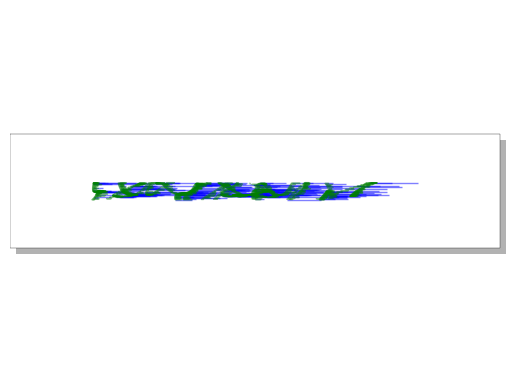

In [58]:
smudge_pts = []
smudge_pts_short = []
for i, coord in enumerate(cutoff_cursive):
    if i % int(uniform(5,10)) == 0:
        smudge_pts.append([coord[0],coord[1],coord[0],coord[1]])
    if i % int(uniform(4,3)) == 0:
        smudge_pts_short.append([coord[0],coord[1],coord[0],coord[1]])

smudge_length = []
vsk = vsketch.Vsketch()
vsk.size("215mm", "50mm")
vsk.scale("1mm")
with vsk.pushMatrix():
    vsk.scale(5)
    vsk.penWidth("0.1mm",1)
    vsk.penWidth("0.1mm",2)
    vsk.stroke(3)
#     vsk.polygon(cutoff_cursive)
    for i in range(len(smudge_pts)):
        if i < len(smudge_pts) - 1:
            smudge_density = abs(smudge_pts[i+1][1]-smudge_pts[i][1])
#             if smudge_density < 0.1:
            for j in range(1):
                vsk.stroke(1)
                vsk.strokeWeight(1)
                vsk.line(smudge_pts[i+j][0], smudge_pts[i+j][1], smudge_pts[i+j][0]+abs(normal(2, 1)), smudge_pts[i+j][3])
            
    for i in range(len(smudge_pts_short)):
        vsk.strokeWeight(2)            
        if i < len(smudge_pts_short)-1:    
            smudge_density = abs(smudge_pts_short[i+1][1]-smudge_pts_short[i][1])
#             if smudge_density < 2:
            for j in range(1):        
                vsk.stroke(2)
                vsk.line(smudge_pts_short[i+j][0], smudge_pts_short[i+j][1], smudge_pts_short[i+j][0]+(2 - smudge_density)*abs(normal(0.2, 0.1)), smudge_pts_short[i+j][3])
vsk.display()

In [402]:
def clipped_cursive_line(pt_count=6,
                         n_glyphs=10,
                         spacing=2.5,
                         catmull=-0.5,
                         shear_angle=np.pi*-0.25):
    
    xgrid = [0, 0.5, 1, 1.5, 2]
    ygrid = [0, 0.333, 1, 1.333, 2]
    cursive_line = []
        
    for i in range(n_glyphs):
        pts = []
        for j in range(pt_count):
            pts.append([random.choice(xgrid), random.choice(ygrid)])
        translated = [[x + i * spacing, y] for x, y in pts]
        cursive_line += translated
            
    cursive_curve = Polyline(cursive_line).catmull_spline(catmull).to_polyline(40)
    shear_cursive = []
        
    for coord in cursive_curve:
        shear_cursive.append([coord[0]+shear_angle*coord[1], coord[1]])
    cutoff_cursive = []
        
    for coord in shear_cursive:
        if coord[1] > 0.25 and coord[1] < 1.75:
            cutoff_cursive.append(coord)
    return cutoff_cursive

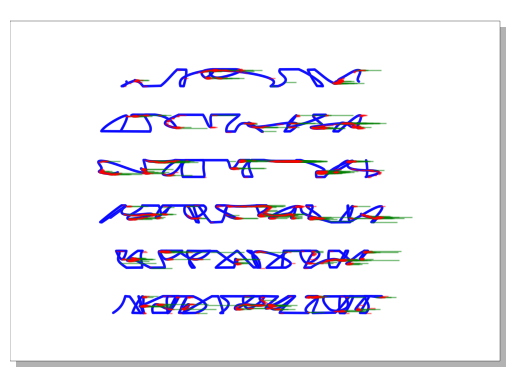

In [468]:
vsk = vsketch.Vsketch()
vsk.size("216mm", "150mm")
vsk.scale("1mm")
vsk.penWidth("0.1mm",1)
vsk.penWidth("0.1mm",2)
vsk.penWidth("0.1mm",3)
    
for i in range(6):
    with vsk.pushMatrix():
        vsk.translate(0,i*20)
        vsk.scale(5)
        vsk.strokeWeight(7)
        vsk.stroke(1)
        smudge_lines = []
        for coord in clipped_cursive_line(pt_count=3+i, shear_angle= i*-0.1):
            smudge_lines.append([coord[0],coord[1]])
        smudge_pts = []
        for k, coord in enumerate(smudge_lines):
            if k % int(uniform(3,6)) == 0:
                smudge_pts.append([coord[0],coord[1],coord[0],coord[1]])
        smudge_pts_short = []
        for k, coord in enumerate(smudge_lines):
            if k % int(uniform(1,4)) == 0:
                smudge_pts_short.append([coord[0],coord[1],coord[0],coord[1]])
        
        vsk.polygon(smudge_lines)
        
        for j in range(len(smudge_pts)):
            if j < len(smudge_pts)- 1:
                smudge_density = abs(smudge_pts[j][1]-smudge_pts[j+1][1])
                if smudge_density < 0.02:
                    for k in range(1):
                        vsk.strokeWeight(1)
                        vsk.stroke(2)
                        vsk.line(smudge_pts[j+k][0], smudge_pts[j+k][1], smudge_pts[j+k][0]+(0.03-smudge_density)*10*abs(normal(8, 3)), smudge_pts[j+k][3])
                        
        for j in range(len(smudge_pts_short)):
            if j < len(smudge_pts_short)- 1:
                smudge_density_short = abs(smudge_pts_short[j][1]-smudge_pts_short[j+1][1])
                if smudge_density_short < 0.02:
                    for k in range(1):
                        vsk.strokeWeight(1)
                        vsk.stroke(3)
                        vsk.line(smudge_pts_short[j+k][0], smudge_pts_short[j+k][1], smudge_pts_short[j+k][0]+(0.03-smudge_density_short)*10*abs(normal(1.5, 0.5)), smudge_pts_short[j+k][3])
                        
vsk.display()

In [102]:
vsk.save("test.svg")
ad.plot_setup("test.svg")
ad.options.mode = "layers"
ad.options.layer = 2
ad.plot_run()

In [212]:
!axicli --mode align

In [210]:
!axicli --mode align --mode cycle

In [215]:
!axicli --mode manual -M lower_pen

In [216]:
!axicli --mode manual -M raise_pen